<a href="https://colab.research.google.com/github/thanhnt19146391/thanhnt19146391/blob/main/Ex1_BuiltModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
# Import the necessary packages
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [173]:
def show_gray_img(img):
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.colorbar()
    plt.show()

In [174]:
def show_rgb_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.colorbar()
    plt.show()

In [175]:
IMG_SIZE = (150 , 150)
N = 60
PATH = "/content/drive/MyDrive/Colab Notebooks/AI/ANN_Execises/"
TRAIN_PATH = "/content/drive/MyDrive/Colab Notebooks/AI/ANN_Execises/Ex1_train/Formated/"
TEST_PATH = "/content/drive/MyDrive/Colab Notebooks/AI/ANN_Execises/Ex1_test/Formated/"
EPOCHS = 200
BATCH_SIZE = 16
VERBOSE = 1
NB_CLASS = 2   # number of outputs = number of digits
N_HIDDEN = 128 
VALIDATION_SPLIT = 0.2    # how much TRAIN is reserved for VALIDATION
RESHAPED = 150 * 150
PATH = "/content/drive/MyDrive/Colab Notebooks/AI/ANN_Execises/"
DROPOUT = 0.3
IMG_SIZE = (150 , 150)

In [176]:
# Read datasets
x_train = []
y_train = np.zeros((N, ), dtype = np.uint8)
for i in range(N):    
    img = cv2.imread(TRAIN_PATH + str(i) + ".jpg", 0)
    x_train.append(img)

x_train = np.array(x_train)
x_train = x_train.reshape(N, 150, 150)

for i in range(22):
    y_train[i] = 1

print(x_train.shape)
print(y_train.shape)
# for i in range(N): 
#     show_gray_img(x_train[i])
#     print(y_train[i])

(60, 150, 150)
(60,)


In [177]:
# Format input function
def format_input(x):
  global RESHAPE
  x = x.reshape(x.shape[0], RESHAPED)
  x = x.astype('float32')
  x /= 255
  return x

In [178]:
# Format inputs
x_train = format_input(x_train)

print("x train shape", x_train.shape)

x train shape (60, 22500)


In [179]:
# Format outputs - OHE - One Hot Encoding

print(y_train.shape)

# print(y_train)

y_train = np_utils.to_categorical(y_train, NB_CLASS)

# print(y_train)

(60,)


In [180]:
# Save model
def Save_model(i, model):
    global PATH
    model_name = "Ex1_model" + str(i) + ".h" 
    model.save(PATH + model_name)
    model = load_model(PATH + model_name)

In [181]:
# Load model
def Load_model(i):
    global PATH
    model_name = "Ex1_model" + str(i) + ".h" 
    return load_model(PATH + model_name)

In [182]:
# Built the model
def Built_model():
    model = Sequential()

    global RESHAPED, DROPOUT
    model.add(
        Dense(
            N_HIDDEN,
            input_shape = (RESHAPED,),
            name = 'dense_layer',
            activation = 'relu'
        )
    )

    model.add(
        Dropout(DROPOUT)
    )

    model.add(
        Dense(
            N_HIDDEN,
            name = 'dense_layer2',
            activation = 'relu'
        )
    )

    model.add(
        Dropout(DROPOUT)
    )

    model.add(
        Dense(
            NB_CLASS,
            name = 'dense_layer3',
            activation = 'softmax'
        )
    )

    #Summary of the model
    model.summary()

    # Compiling the model
    model.compile(
        optimizer = 'Adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )


    model.fit(
        x_train,
        y_train,
        batch_size = BATCH_SIZE,
        epochs = EPOCHS,
        verbose = VERBOSE,
        validation_split = VALIDATION_SPLIT
    )

    # Evaluating the model
    # test_loss, test_acc = model.evaluate(x_test, y_test)
    # print('Test accuracy: ', test_acc)
    return model

In [183]:
model = Built_model()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               2880128   
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_layer2 (Dense)        (None, 128)               16512     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_layer3 (Dense)        (None, 2)                 258       
                                                                 
Total params: 2,896,898
Trainable params: 2,896,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
3/3 [===========================

In [184]:
Save_model(2, model)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/AI/ANN_Execises/Ex1_model2.h/assets


In [188]:
# Upload file from computer to Colab

# Import
from google.colab import files
uploaded = files.upload()

Saving 10.jpg to 10.jpg


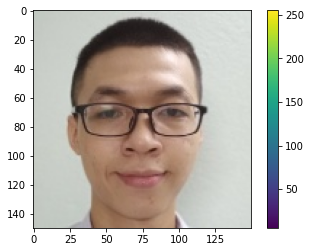

Thanh


In [191]:
model = Load_model(1)
Who_I_Am = [
            "Not Thanh",
            "Thanh"
]

img = cv2.imread("10.jpg")
min = np.min(img.shape[:2])    
img = img[:min, :min]
img = cv2.resize(img, IMG_SIZE)
show_rgb_img(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.reshape(1, RESHAPED)
# print(img.shape)
img = img.astype('float32')
img /= 255

predictions = model.predict(img)
print(Who_I_Am[np.argmax(predictions, axis = 1)[0]])